In [15]:
import numpy as np
import pandas as pd
df_landcover = pd.read_csv("../data/iwildcam_2022_landcover.csv")
df_elevation = pd.read_csv("../data/iwildcam_2022_dem.csv")
df_combined = df_landcover.merge(df_elevation, on="name")

In [16]:
df_combined.columns

Index(['system:index_x', 'bare-coverfraction', 'crops-coverfraction',
       'data-density-indicator', 'discrete_classification',
       'discrete_classification-proba', 'forest_type', 'grass-coverfraction',
       'moss-coverfraction', 'name', 'shrub-coverfraction',
       'snow-coverfraction', 'tree-coverfraction', 'urban-coverfraction',
       'water-permanent-coverfraction', 'water-seasonal-coverfraction',
       '.geo_x', 'system:index_y', 'elevation', '.geo_y'],
      dtype='object')

In [6]:
features = np.stack([df_landcover[col] for col in df_combined.columns if col.endswith("coverfraction")]).T

[0.95542528 0.02338637]



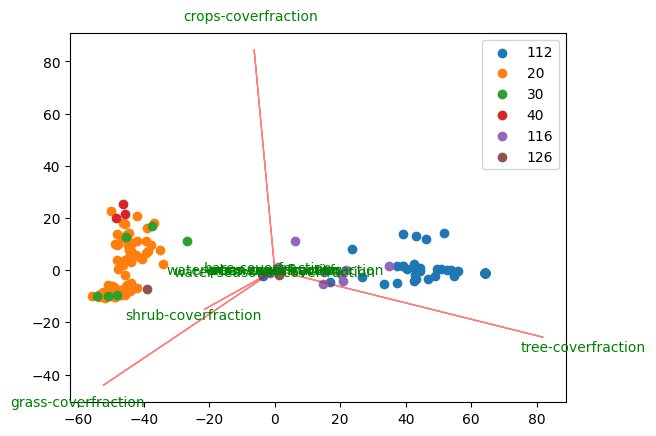

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(features)
print(pca.explained_variance_ratio_)
features_transformed = pca.transform(features)

for discrete_classification in df_combined["discrete_classification"].unique():
    mask = df_combined["discrete_classification"] == discrete_classification
    plt.scatter(features_transformed[mask, 0], features_transformed[mask, 1], label=discrete_classification)
plt.legend()

coeff = pca.components_[0:2, :].T
for i, varname in zip(range(features.shape[1]), [col for col in df_combined.columns if col.endswith("coverfraction")]):
    plt.arrow(0, 0, coeff[i,0] * 100, coeff[i,1] * 100,color = 'r',alpha = 0.5)
    plt.text(coeff[i,0]* 115., coeff[i,1] * 115., varname, color = 'g', ha = 'center', va = 'center')

In [ ]:
import geopandas as gpd
